# HW 7

ISE 530 Optimization for Analytics Homework VII: Duality theory. Due 11:59 PM Wednesday November 04, 2020

- Describe a dual-based algorithm (not the dual simplex) for solving a linear program with two constraints:

\begin{align}
    \underset{x}{\text{minimize }} 
    & \sum^n_{i=1} c_ix_i \\
    \text{subject to } 
    & \sum^n_{i=1} a_i x_i \geq \alpha, (a_i\text{ and }\alpha\text{ are positive constants}) \\
    & \sum^n_{i=1}x_i = 1\text{ , and }x_i \geq 0\text{, for all }i = 1, \cdots n, \\
\end{align}

where it is given that $\sum^n_{i=1} a_i \geq n\alpha$ (this ensures feasibility of the problem). The algorithm can be accomplished in several steps.

Step 1. Letting $\lambda \geq 0$ and $\mu$ (un-restricted in sign) be the two dual variables of the respective constraints of (2), form the dual program of the given linear program.

Step 2. The constraints of the dual program suggest that the optimizing $\lambda$ can be uniquely determined from $\mu$. Substituting this expression into the objective function of the dual reduces the dual
program to a problem in the $\mu$-variable alone.

Step 3. The resulting univariate dual program (in $\mu$) can be solved by a simple sorting procedure.

Step 4. Use complementary slackness to recover a solution to the primal program.

- Extend the procedure in the above exercise to case where the objective function is replaced by $\sum^n_{i=1} c_i x^2_i$ with the coefficients $c_i$ being all positive. Apply the resulting procedure to the problem:

\begin{align}
    \underset{x}{\text{minimize }} 
    & x^2_1 + x^2_2 \\
    \text{subject to } 
    & 2x_1 + 3x_2 \geq 2 \\
    & x_1 + x_2 = 1\text{, and }x_i \geq 0. \\
\end{align}

Verify your solution graphically by considering the problem as a "nearest-point" problem.

- Do Exercise 11.13 in the Cottle-Thapa text. Apply this exercise to the case where each function $f_j(x_j) = c_jx_j + \frac{1}{2}x^2_j$ and describe a simple procedure for solving the problem. [This exercise shares some similarities with the preceding two problems.]

- Do Exercises 11.31, 11.32, and 11.36 in the Cottle-Thapa text.

- Determine the minimum objective value and minimizers of the convex program:

\begin{align}
    \underset{x, y}{\text{minimize }} 
    & e^{-y}
    \text{ subject to } 
    \sqrt{x^2 + y^2} - x \leq 0,
\end{align}

Show that the dual function:

\begin{align}
    d(\mu) \overset{\Delta}{=} \underset{x, y}{\text{minimize }} 
    & e^{-y} + \mu \Big[ \sqrt{x^2 + y^2} - x \Big], \mu \geq 0
\end{align}

is identically equal to zero but this value is not attained, for any $\mu \geq 0$. This convex program has a positive gap in this generalized sense. Without worrying about the non-attainment issue of the dual function, what goes wrong with this example with reference to the general duality theory?

In [1]:
%load_ext autotime
%load_ext nb_black
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (16, 12)

import operator
import pandas as pd
import numpy as np
import cvxpy as cp
import scipy as sp
from sympy import Matrix
from scipy import optimize

<IPython.core.display.Javascript object>

- Describe a dual-based algorithm (not the dual simplex) for solving a linear program with two constraints:

\begin{align}
    \underset{x}{\text{minimize }} 
    & \sum^n_{i=1} c_ix_i \\
    \text{subject to } 
    & \sum^n_{i=1} a_i x_i \geq \alpha, (a_i\text{ and }\alpha\text{ are positive constants}) \\
    & \sum^n_{i=1}x_i = 1\text{ , and }x_i \geq 0\text{, for all }i = 1, \cdots n, \\
\end{align}

where it is given that $\sum^n_{i=1} a_i \geq n\alpha$ (this ensures feasibility of the problem). The algorithm can be accomplished in several steps.

Step 1. Letting $\lambda \geq 0$ and $\mu$ (un-restricted in sign) be the two dual variables of the respective constraints of (2), form the dual program of the given linear program.

Step 2. The constraints of the dual program suggest that the optimizing $\lambda$ can be uniquely determined from $\mu$. Substituting this expression into the objective function of the dual reduces the dual
program to a problem in the $\mu$-variable alone.

Step 3. The resulting univariate dual program (in $\mu$) can be solved by a simple sorting procedure.

Step 4. Use complementary slackness to recover a solution to the primal program.

- Extend the procedure in the above exercise to case where the objective function is replaced by $\sum^n_{i=1} c_i x^2_i$ with the coefficients $c_i$ being all positive. Apply the resulting procedure to the problem:

\begin{align}
    \underset{x}{\text{minimize }} 
    & x^2_1 + x^2_2 \\
    \text{subject to } 
    & 2x_1 + 3x_2 \geq 2 \\
    & x_1 + x_2 = 1\text{, and }x_i \geq 0. \\
\end{align}

Verify your solution graphically by considering the problem as a "nearest-point" problem.

Step 1 - Dual Program:

\begin{align}
    \underset{\lambda, \mu}{\text{maximize }} 
    & 2\lambda + \mu \\
    \text{subject to } 
    & 2\lambda + \mu \leq 1 \\
    & 3\lambda + \mu = 1\text{, and }\lambda \geq 0, \mu \text{ free}. \\
\end{align}

From constraint $3\lambda + \mu = 1$,

\begin{align}
    \lambda = \frac{1 - \mu}{3} \\
\end{align}

Step 2 - Substituting $\lambda$ into objective function, dual program becomes parameterized by $\mu$ alone:

\begin{align}
    \underset{\mu}{\text{maximize }} 
    & 2\Big(\frac{1 - \mu}{3}\Big) + \mu \\
    \text{subject to } 
    & 2\Big(\frac{1 - \mu}{3}\Big) + \mu \leq 1 \text{, and } \mu \text{ free}. \\
\end{align}

Step 3 - Set objective value to 1:

\begin{align}
    2\Big(\frac{1 - \mu}{3}\Big) + \mu &= 1 \\
    \frac{2}{3} - \frac{2}{3}\mu + \mu &= 1 \\
    \frac{1}{3}\mu &= \frac{1}{3} \\
    \mu^* &= 1, \lambda^* = 0 \\
\end{align}

Step 4 - Complementary Slackness:

Lagrangian:

\begin{align}
    \mathcal{L}(x_1, x_2, \lambda, \mu) &= x^2_1 + x^2_2 - \lambda(2x_1 + 3x_2 - 2) - \mu(x_1 + x_2 - 1) \\
\end{align}

\begin{align}
    x^*_1 \frac{\partial \mathcal{L}(x_1, x_2, \lambda^*, \mu^*)}{\partial x_1} &= 0 \\
    x^*_1 (2x^*_1 - 1) &= 0 \\
    x^*_1 &= 0.5 \\ 
\end{align}

\begin{align}
    x^*_2 \frac{\partial \mathcal{L}(x_1, x_2, \lambda^*, \mu^*)}{\partial x_2} &= 0 \\
    x^*_2 (2x^*_2 - 1) &= 0 \\
    x^*_2 &= 0.5 \\ 
\end{align}

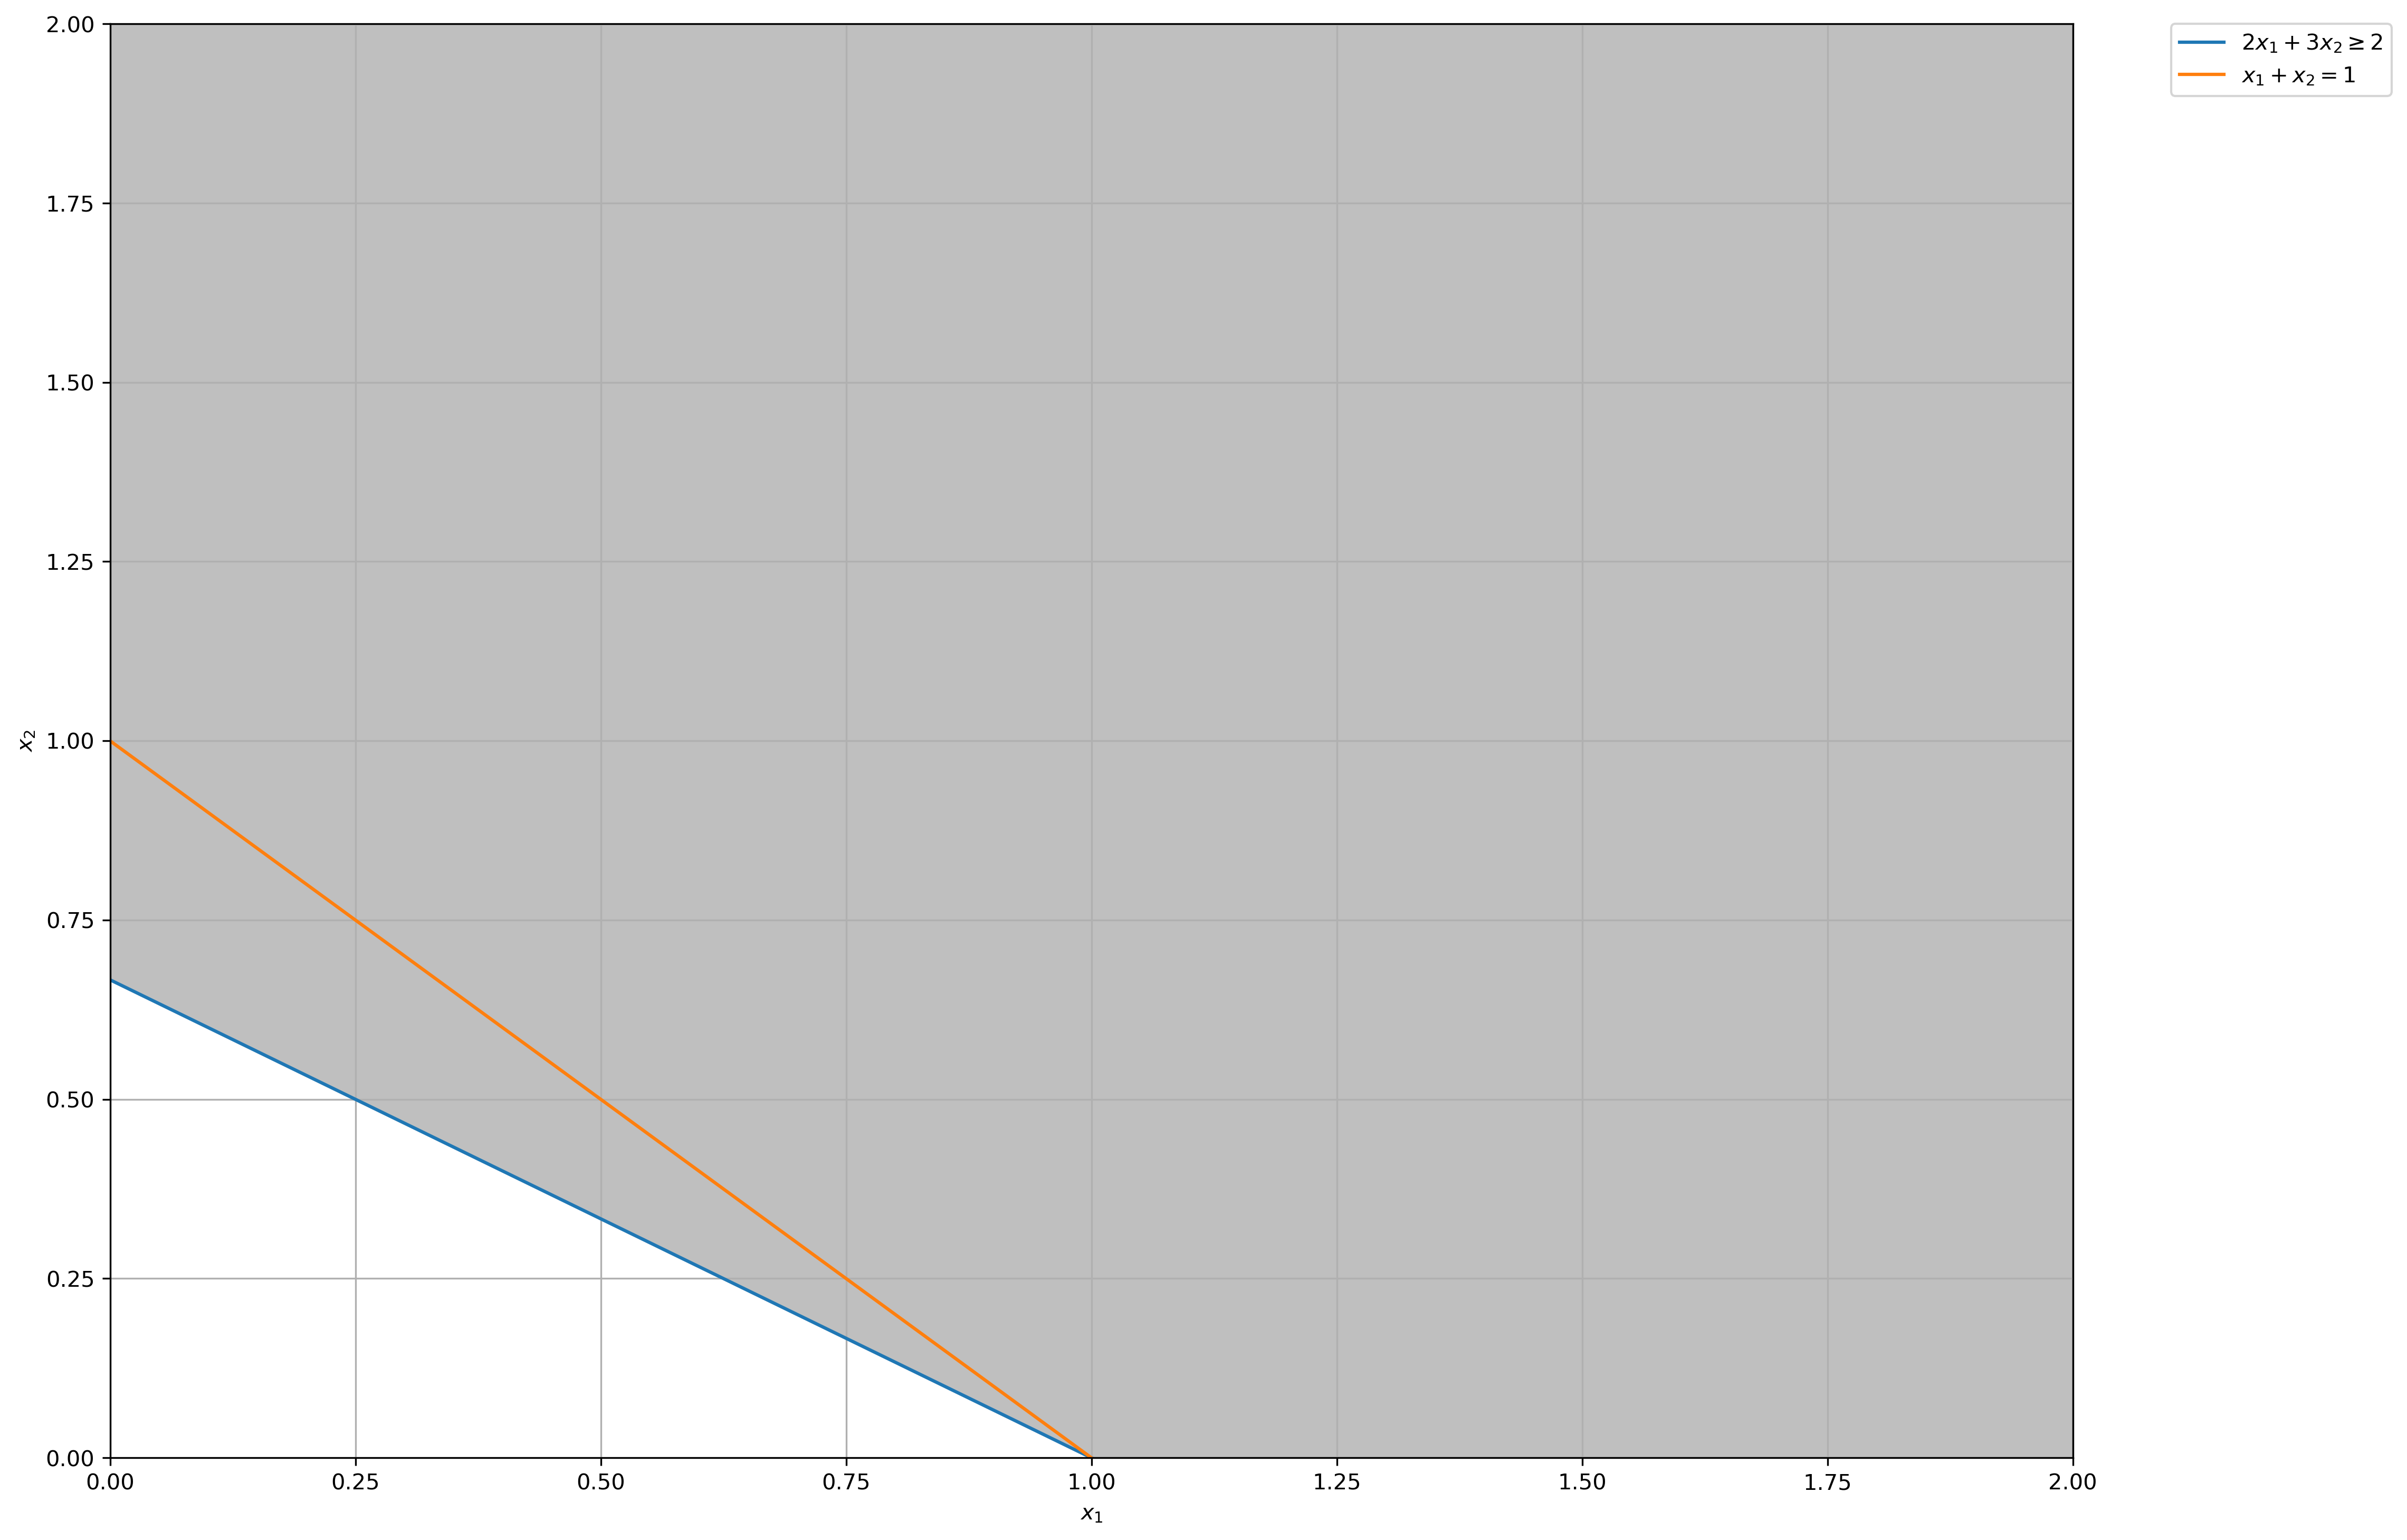

time: 1.52 s


<IPython.core.display.Javascript object>

In [12]:
# Construct lines
x_1 = np.linspace(0, 2, 2000)  # x_1 >= 0
x_2_1 = lambda x_1: (2 - 2 * x_1) / 3  # constraint 1: 2𝑥1 + 3𝑥2 ≥ 2
x_2_2 = lambda x_1: 1 - x_1  # constraint 2: 𝑥1 + 𝑥2 = 1

# Make plot
plt.plot(x_1, x_2_1(x_1), label=r"$2x_1 + 3x_2 \geq 2$")
plt.plot(x_1, x_2_2(x_1), label=r"$x_1 + x_2 = 1$")
plt.xlim((0, 2))
plt.ylim((0, 2))
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

# Fill feasible region
x_2_lb = np.maximum(x_2_1(x_1), np.zeros(len(x_1)))
x_2_ub = np.array([2] * len(x_1))
plt.fill_between(x_1, x_2_lb, x_2_ub, where=x_2_ub > x_2_lb, color="grey", alpha=0.5)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

The minimum squared euclidean norm satisfying the constraint of $x_1 + x_2 = 1$ above (perpendicular to the $x_1 + x_2 = 1$ hyperplane) is $x^*_1 = 0.5, x^*_2 = 0.5$, hence the solution we found via complementary slackness is verified optimal.

---
### 11.13

A function $f: \mathbb{R}^n \rightarrow \mathbb{R}$ is said to be *separable* if it can be written as the sum of functions of a single real variable, that is

\begin{align}
    f(x_1, x_2, \cdots , x_n) &= \sum^{n}_{j=1} f_j (x_j). \\
\end{align}

(a) Let $f$ be a differentiable separable function and consider the nonlinear program

\begin{align}
    \text{minimize } & f(x_1, x_2, \cdots , x_n) \\
    \text{subject to } & \sum^{n}_{j=1} x_j = \sigma \\
    x_j \geq 0, j = 1, \cdots, n,
\end{align}

where $\sigma$ is a positive scalar. Write the first-order conditions for a
local minimizer $\bar{x}$ in this nonlinear program.

Lagrangian:

\begin{align}
    \mathcal{L}(x, \mu) &= \sum^{n}_{j=1} f_j (x_j) + \mu\Big(\sum^{n}_{j=1} x_j - \sigma\Big) \\
\end{align}

First Order conditions for a local minimizer $\bar{x}$ in this nonlinear program:

\begin{align}
    \begin{bmatrix} f^\prime_1 (\bar{x}_1) \\ f^\prime_2 (\bar{x}_2) \\ \vdots \\ f^\prime_n (\bar{x}_n) \\ \end{bmatrix} &= 0 \\
\end{align}

$\mu$ is free.

(b) Recall that if $x \in \mathbb{R}^n$, the set $\{j : x_j \not= 0\}$ is called the *support* of $x$, denoted by $\sup(x)$. Show that every feasible solution in part (a) has a nonempty support.

Since we know that $\sigma$ is a positive scalar, $x_j \geq 0$, and a feasible solution to part (a) must satisfy the constraint $\sum^{n}_{j=1} x_j = \sigma$, one of the $x_j$s **MUST** be positive, hence any feasible solution will have a nonempty support $\blacksquare$.

(c) Show that there is a real number $\kappa$ such that if $x^∗$ is a local minimizer of the nonlinear program in part (a), then for all $j \in \sup(x^∗)$

\begin{align}
    \frac{\partial f_j (x^*_j)}{\partial x_j} &= \kappa. \\
\end{align}

As shown in the first order conditions, the partial derivative (simply the derivative since the function is of just one variable), must be 0. Hence $\kappa = 0$.

- Do Exercise 11.13 in the Cottle-Thapa text. Apply this exercise to the case where each function $f_j(x_j) = c_jx_j + \frac{1}{2}x^2_j$ and describe a simple procedure for solving the problem. [This exercise shares some similarities with the preceding two problems.]

\begin{align}
    f^\prime_j(x_j) = c_j + x_j \\
\end{align}

Since the gradients of each function $f_j(x_j)$, $f^\prime_j(x_j) = 0$, we can just set each $x_j = -c_j$. Since coefficient of $x^2_j$ in $f_j(x_j)$ is $> 0$, the hessian of this univariate function is positive definite, hence function is strictly convex, and since our function for the optimization problem is a sum composition of striclty convex functions, it is also strictly convex, hence our solution will be the global minimizer.

---
### 11.31

Find all extremal values of $z$, and the corresponding values of $x_1$ and $x_2$, using the method of Lagrange multipliers in the following two instances.

(a) 

\begin{align}
    x_1x_2 + 4 &= z \\
    x^2_1 + x^2_2 &= 8. \\
\end{align}

Finding infimum of Lagrangian:

\begin{align}
    \nabla_x \mathcal{L}(x_1, x_2, \lambda) &= 0 \\
    \nabla_x \Big(x_1x_2 + 4 + \lambda(x^2_1 + x^2_2 - 8)\Big) &= 0 \\
    \begin{bmatrix} x_2 + 2\lambda x_1 \\ x_1 + 2\lambda x_2 \\ \end{bmatrix} &= \begin{bmatrix} 0 \\ 0 \\ \end{bmatrix} \\
    \newline \\
    \text{Substituting }x_1 = -\frac{x_2}{2\lambda}, & \\ 
    -\frac{x_2}{2\lambda} + 2\lambda x_2 &= 0 \\
    2\lambda x_2 &= \frac{x_2}{2\lambda} \\
    4\lambda^2 x_2 &= x_2 \\
    \lambda &= \pm\frac{1}{2} \\
\end{align}

Case I: $\lambda = \frac{1}{2} \rightarrow x_1 = -x_2$

\begin{align}
    x^2_1 + x^2_2 &= 8 \\
    (-x_2)^2 + x^2_2 &= 8 \\
    2x^2_2 &= 8 \\
    x^2_2 &= 4 \\
    x_2 &= \pm2 \text{ and } x_1 = \mp2, z = 0 \\
\end{align}

Case II: $\lambda = -\frac{1}{2} \rightarrow x_1 = x_2$

\begin{align}
    x^2_1 + x^2_2 &= 8 \\
    (-x_2)^2 + x^2_2 &= 8 \\
    2x^2_2 &= 8 \\
    x^2_2 &= 4 \\
    x_2 &= \pm2 \text{ and } x_1 = \pm2, z = 8 \\
\end{align}

(b)

\begin{align}
    x_1 + 2x_2 &= z \\
    x^2_1 + x^2_2 &= 13. \\
\end{align}

Finding infimum of Lagrangian:

\begin{align}
    \nabla_x \mathcal{L}(x_1, x_2, \lambda) &= 0 \\
    \nabla_x \Big(x_1 + 2x_2 + \lambda(x^2_1 + x^2_2 - 13)\Big) &= 0 \\
    \begin{bmatrix} 1 + 2\lambda x_1 \\ 2 + 2\lambda x_2 \\ \end{bmatrix} &= \begin{bmatrix} 0 \\ 0 \\ \end{bmatrix} \\
    x^* &= -\frac{1}{\lambda}\begin{bmatrix} \frac{1}{2} \\ 1 \\ \end{bmatrix}
\end{align}

Primal Feasibility:

\begin{align}
    x^2_1 + x^2_2 &= 13 \\
    (-\frac{1}{2\lambda})^2 + (-\frac{1}{\lambda})^2 &= 13 \\
    \frac{1}{4\lambda^2} + \frac{1}{\lambda^2} &= 13 \\
    \frac{5}{4\lambda^2} &= 13 \\
    5 &= 52\lambda^2 \\
    \lambda &= \pm\sqrt{\frac{5}{52}} \\
\end{align}

Case I: $\lambda = \sqrt{\frac{5}{52}} \rightarrow x^* = -\sqrt{\frac{52}{5}}\begin{bmatrix} \frac{1}{2} \\ 1 \\ \end{bmatrix}$

\begin{align}
    x_1 &= -\frac{1}{2}\sqrt{\frac{52}{5}} \\
    x_2 &= -\sqrt{\frac{52}{5}} \\
    z &= -\frac{5}{2}\sqrt{\frac{52}{5}} \\
\end{align}

Case II: $\lambda = -\sqrt{\frac{5}{52}} \rightarrow x^* = \sqrt{\frac{52}{5}}\begin{bmatrix} \frac{1}{2} \\ 1 \\ \end{bmatrix}$

\begin{align}
    x_1 &= \frac{1}{2}\sqrt{\frac{52}{5}} \\
    x_2 &= \sqrt{\frac{52}{5}} \\
    z &= \frac{5}{2}\sqrt{\frac{52}{5}} \\
\end{align}

---
### 11.32

Consider the following univariate optimization problem

\begin{align}
    \text{minimize } & x^2 \\
    \text{subject to } & x^2 - 5x + 6 \leq 0. \\ 
\end{align}

(a) Form the Lagrangian.

Lagrangian function:

\begin{align}
    \mathcal{L}(x, \lambda) &= x^2 + \lambda(x^2 - 5x + 6) \\
\end{align}

(b) Find the dual of the problem.

Lagrangian Dual Function:

\begin{align}
    g(\lambda) 
    &= \underset{x}{\text{inf}} \mathcal{L}(x, \lambda) \\
    &= \underset{x}{\text{inf}}\Big(x^2 + \lambda(x^2 - 5x + 6)\Big) \\
\end{align}

Dual Problem:

\begin{align}
    \underset{\lambda}{\text{maximize }} & g(\lambda)  \\
    \text{subject to } & \lambda \geq 0. \\ 
\end{align}

Finding infimum of Lagrangian:

\begin{align}
    \nabla_x \mathcal{L}(x, \lambda) &= 0 \\
    \nabla_x \Big( x^2 + \lambda(x^2 - 5x + 6) \Big) &= 0 \\
    2x + \lambda(2x - 5) &= 0 \\
    x^* &= \frac{5\lambda}{(2 + 2\lambda)} \\
\end{align}

Lagrangian Dual Function:

\begin{align}
    g(\lambda) 
    &= (x^*)^2 + \lambda((x^*)^2 - 5x^* + 6) \\
    &= \Big(\frac{5\lambda}{(2 + 2\lambda)}\Big)^2 + \lambda\Big(\Big(\frac{5\lambda}{(2 + 2\lambda)}\Big)^2 - 5\frac{5\lambda}{(2 + 2\lambda)} + 6\Big) \\
    &= \lambda\frac{24 + 23\lambda - \lambda^2}{(2 + 2\lambda)^2} \\
\end{align}

Substituting into Dual Problem:

\begin{align}
    \underset{\lambda}{\text{maximize }} & \lambda\frac{24 + 23\lambda - \lambda^2}{(2 + 2\lambda)^2} \\
    \text{subject to } & \lambda \geq 0. \\ 
\end{align}

Supremum of Dual function:

\begin{align}
    \nabla_\lambda g(\lambda) &= 0 \\
    \nabla_\lambda \lambda\frac{24 + 23\lambda - \lambda^2}{(2 + 2\lambda)^2} &= 0 \\
    \frac{-2(\lambda^3 + 3\lambda^2 - 22\lambda - 24)}{(2+2\lambda)^3} &= 0 \\
    \frac{-2(0.5\lambda^2 + \lambda - 12)(2+2\lambda)}{(2+2\lambda)^3} &= 0 \\
    \frac{-\lambda^2 - 2\lambda + 24}{(2+2\lambda)^2} &= 0 \\
    \frac{-(\lambda + 6)(\lambda - 4)}{(2+2\lambda)^2} &= 0 \\
\end{align}

Case I: $\lambda^* = -6$

Rejected, since $\lambda \geq 0$ constraint.

Case II: $\lambda^* = 4$

Optimal Dual Objective value:
\begin{align}
    g(\lambda^*) 
    &= \lambda^*\frac{24 + 23\lambda^* - (\lambda^*)^2}{(2 + 2\lambda^*)^2} \\
    &= 4\frac{24 + 23(4) - 4^2}{(2 + 2(4))^2} \\
    &= 4\frac{24 + 92 - 16}{(2 + 8)^2} \\
    &= 4\frac{100}{100} \\
    &= 4 \\
\end{align}

(c) Verify the Weak Duality Theorem for this problem. 

Primal Objective value:

With $x^* = \frac{5\lambda}{(2 + 2\lambda)}$ and $\lambda^* = 4$,

\begin{align}
    f(x^*) &= \Big(\frac{5(4)}{(2 + 2(4))}\Big)^2 \\
    &= 4 \\
\end{align}

Since solution to primal (4) is $\geq$ solution to dual (4), weak duality holds.

(d) Does Strong Duality hold, or is there a duality gap?

Since the duality gap is 0 as optimal objective value for both primal and dual problem is the same, Strong duality holds.

---
### 11.36

Use the Lagrangian dual process to show that

\begin{align}
    X &= \{ x \in \mathbb{R}^3: x^2_1 + x^2_2 + x^2_3 \leq 1\text{ and }x_1 + x_2 + x_3 = 2 \}
\end{align}

is an empty set.

Suppose the following maximization problem

\begin{align}
    \underset{x_1,x_2,x_3}{\text{maximize }} & x^2_1 + x^2_2 + x^2_3 \\
    \text{subject to } & x_1 + x_2 + x_3 = 2. \\ 
\end{align}

Lagrangian:

\begin{align}
    \mathcal{L}(x_1,x_2,x_3,\mu) &= x^2_1 + x^2_2 + x^2_3 + \mu(x_1 + x_2 + x_3 - 2) \\
\end{align}

First order conditions:

\begin{align}
    \nabla_x\mathcal{L}(x_1,x_2,x_3,\mu) &= 0 \\
    2\begin{bmatrix}
        x_1 \\
        x_2 \\
        x_3 \\
    \end{bmatrix} 
    + 2\mu\begin{bmatrix}
        1 \\
        1 \\
        1 \\
    \end{bmatrix} 
    &=
    \begin{bmatrix}
        0 \\
        0 \\
        0 \\
    \end{bmatrix} \\
    x^* &= -\mu\begin{bmatrix}
        1 \\
        1 \\
        1 \\
    \end{bmatrix}
\end{align}

Primal Feasibility:

\begin{align}
    x_1 + x_2 + x_3 &= 2 \\
    -3\mu &= 2 \\
    \mu^* &= -\frac{2}{3} \\
\end{align}

Hence,

\begin{align}
    x^* &= \frac{2}{3}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \end{bmatrix} \\
\end{align}

This makes the optimal objective value to the maximization problem: $3\Big(\frac{2}{3}\Big)^2 = \frac{4}{3}$. Hence, since maximium value is not $> 1$, the intersection of the 2 constraints is an empty set. $\blacksquare$

---
- Determine the minimum objective value and minimizers of the convex program:

\begin{align}
    \underset{x, y}{\text{minimize }} 
    & e^{-y}
    \text{ subject to } 
    \sqrt{x^2 + y^2} - x \leq 0,
\end{align}

Show that the dual function:

\begin{align}
    d(\mu) \overset{\Delta}{=} \underset{x, y}{\text{minimize }} 
    & e^{-y} + \mu \Big[ \sqrt{x^2 + y^2} - x \Big], \mu \geq 0
\end{align}

is identically equal to zero but this value is not attained, for any $\mu \geq 0$. This convex program has a positive gap in this generalized sense. Without worrying about the non-attainment issue of the dual function, what goes wrong with this example with reference to the general duality theory?

Lagrangian:

\begin{align}
    \mathcal{L}(x, y, \lambda) &= e^{-y} + \mu \Big[ \sqrt{x^2 + y^2} - x \Big] \\
\end{align}

Lagrangian Dual Function:

\begin{align}
    d(\mu) 
    &= \underset{x,y}{\text{inf}} \mathcal{L}(x, y, \mu) \\
    &= \underset{x,y}{\text{inf}}\Big(e^{-y} + \mu \Big[ \sqrt{x^2 + y^2} - x \Big]\Big) \\
\end{align}

Finding infimum of Lagrangian:

\begin{align}
    \nabla_{x,y} \mathcal{L}(x,y, \lambda) &= 0 \\
    \nabla_{x,y} \Big(e^{-y} + \mu \Big[ \sqrt{x^2 + y^2} - x \Big]\Big) &= 0 \\
    \begin{bmatrix} 0.5\mu(x^2 + y^2)^{-0.5}(2x) -\mu \\ -e^{-y} + 0.5\mu(x^2 + y^2)^{-0.5}(2y) \\ \end{bmatrix} &= \begin{bmatrix} 0 \\ 0 \\ \end{bmatrix} \\
    \begin{bmatrix} \mu x (x^2 + y^2)^{-0.5} -\mu \\ -e^{-y} + \mu y (x^2 + y^2)^{-0.5} \\ \end{bmatrix} &= \begin{bmatrix} 0 \\ 0 \\ \end{bmatrix} \\
    \begin{bmatrix} \mu x \\ \mu y \\ \end{bmatrix} &= \begin{bmatrix} \mu\sqrt{x^2 + y^2} \\ e^{-y}\sqrt{x^2 + y^2} \\ \end{bmatrix} \\
    \newline \\
    \text{From } \mu x = \mu\sqrt{x^2 + y^2}, & \\
    x &= \sqrt{x^2 + y^2} \\
    x^2 &= x^2 + y^2 \\
    y^2 &= 0 \\
    y &= 0 \\
    x &= \text{Any value} \\ 
\end{align}

Hence, since $x$ can take on any value and $y=0$, the dual function reduces to:

\begin{align}
    d(\mu) &= 1 + (\mu - 1)x \\
\end{align}

If we choose $x \rightarrow -\infty$, $d(\mu) \rightarrow -\infty$ and dual function is unbounded below.

Under Weak Duality Thm, we know that the optimal dual value is a lower bound on the optimal primal value, but since our optimal dual value here is $-\infty$, duality theory is useless in helping us find the optimal primal value to the problem.